<a href="https://colab.research.google.com/github/Sen-Ma/Dacon/blob/master/Dacon_%EC%B2%9C%EC%B2%B4%EC%9C%A0%ED%98%95%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/Dacon/train.csv', index_col = 0)
test = pd.read_csv('/content/gdrive/My Drive/Dacon/test.csv', index_col = 0)
sample_submission = pd.read_csv('/content/gdrive/My Drive/Dacon/sample_submission.csv', index_col = 0)

In [0]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
  column_number[column]=i

def to_number(x, dic):
  return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

In [5]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
id,,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


In [0]:
import seaborn as sns 

def draw_types(n=6, regex='psf'):
    labels = train['type'].value_counts().index.tolist()[:n]
    columns = train.filter(regex=regex).columns.tolist()
    colors = ['violet', 'green', 'red', 'cyan', 'yellow']
    waves = [column[-1:] for column in columns]

    fig, axes = plt.subplots(int(n/2), 2, figsize=(10,n), dpi=100)
    w = 1.5
    for i, label in enumerate(labels):
        for column, color, wave in zip(columns, colors, waves):
            q1 = train.loc[train['type'] == label, column].quantile(0.25)
            q3 = train.loc[train['type'] == label, column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (w * iqr)
            upper_bound = q3 + (w * iqr)
            mask = (train.loc[train['type'] == label, column] >= lower_bound) & (train.loc[train['type'] == label, column]<= upper_bound)
            data = train.loc[train['type'] == label, column].loc[mask]

            sns.distplot(data, hist=False, color=color, kde_kws={'shade': True}, 
                         label=wave, ax=axes.flat[i])

        axes.flat[i].set_title(label)
        axes.flat[i].set_xlabel('')
        axes.flat[i].grid(axis='x', linestyle='--')
        axes.flat[i].legend(frameon=True, framealpha=1, shadow=False, 
                            fancybox=False, edgecolor='black')

    fig.tight_layout()
    plt.show()

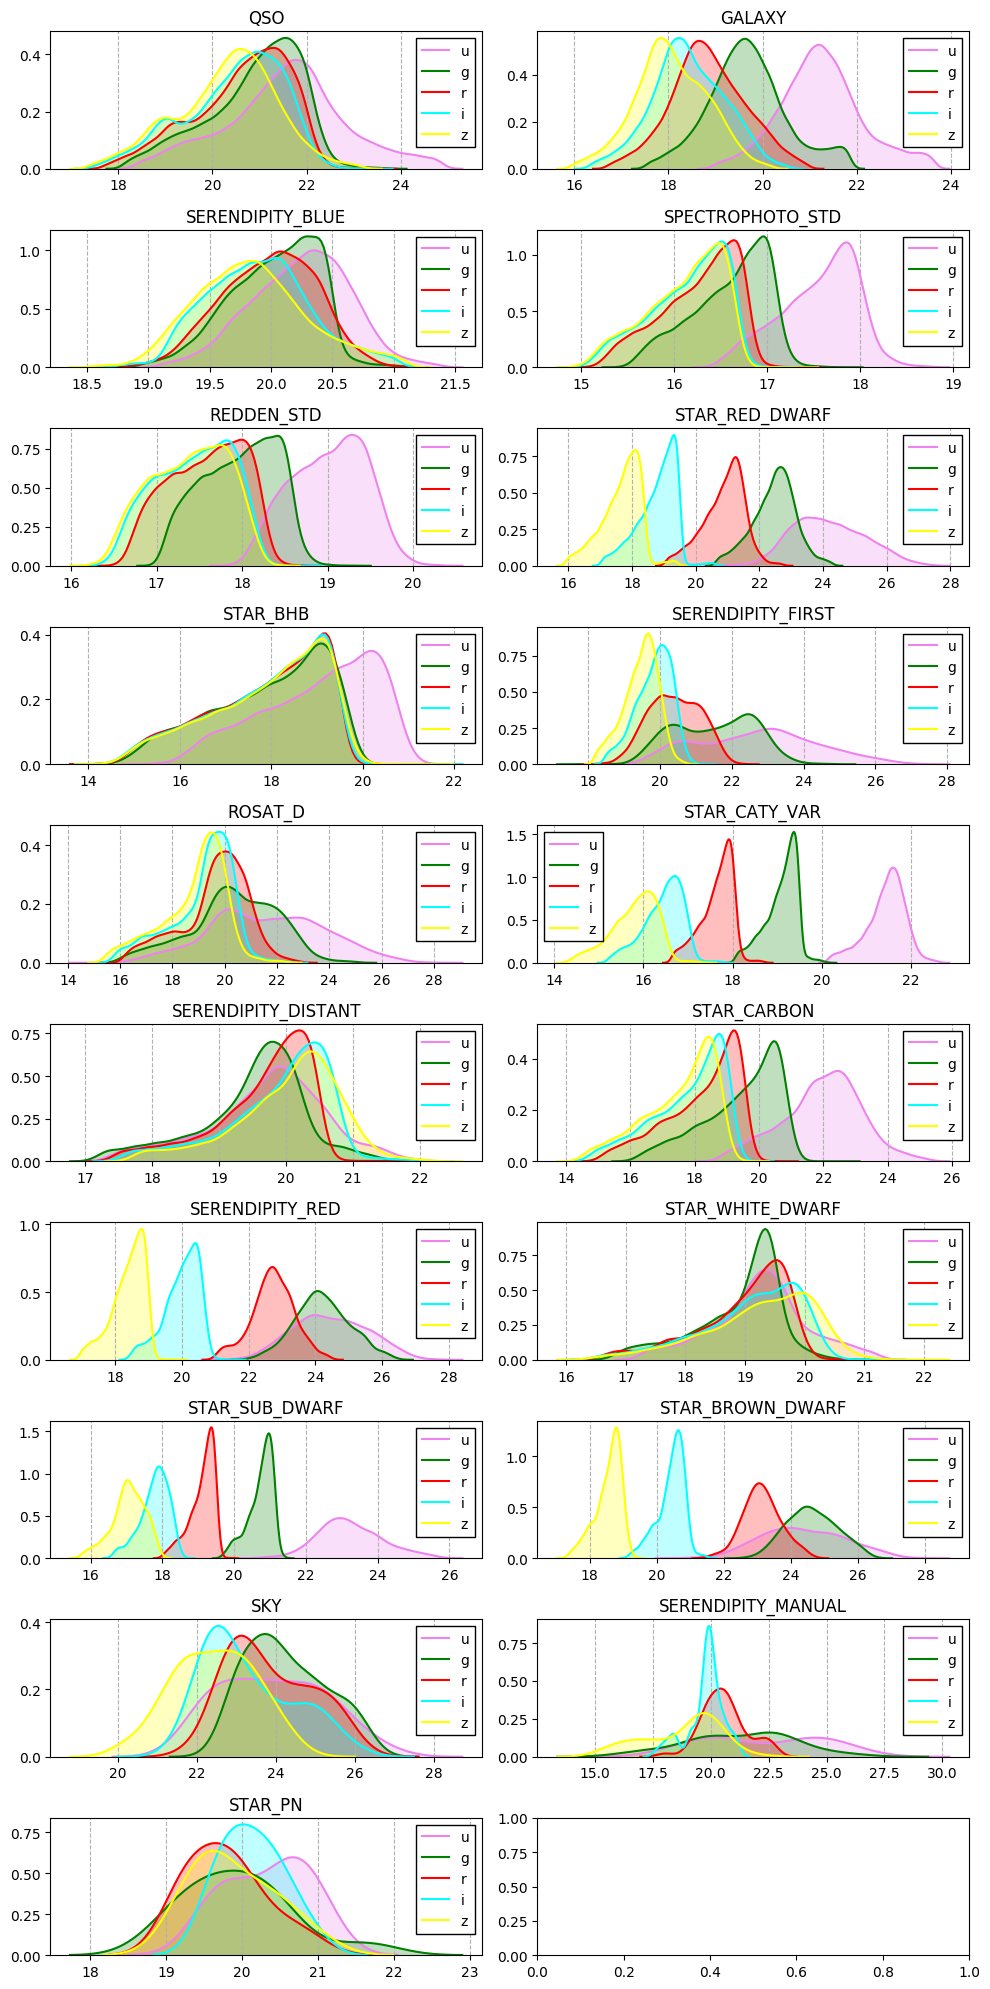

In [7]:
draw_types(n=20, regex = 'psf')

In [0]:
def ratio(X):
  X['psfMag_g_ratio'] = X['psfMag_u']/X['psfMag_g']
  X['psfMag_r_ratio'] = X['psfMag_u']/X['psfMag_r']
  X['psfMag_i_ratio'] = X['psfMag_u']/X['psfMag_i']
  X['psfMag_z_ratio'] = X['psfMag_u']/X['psfMag_z']
  
  X['fiberMag_g_ratio'] = X['fiberMag_u']/X['fiberMag_g']
  X['fiberMag_r_ratio'] = X['fiberMag_u']/X['fiberMag_r']
  X['fiberMag_i_ratio'] = X['fiberMag_u']/X['fiberMag_i']
  X['fiberMag_z_ratio'] = X['fiberMag_u']/X['fiberMag_z']
  
  X['petroMag_g_ratio'] = X['petroMag_u']/X['petroMag_g']
  X['petroMag_r_ratio'] = X['petroMag_u']/X['petroMag_r']
  X['petroMag_i_ratio'] = X['petroMag_u']/X['petroMag_i']
  X['petroMag_z_ratio'] = X['petroMag_u']/X['petroMag_z']
  
  X['modelMag_g_ratio'] = X['modelMag_u']/X['modelMag_g']
  X['modelMag_r_ratio'] = X['modelMag_u']/X['modelMag_r']
  X['modelMag_i_ratio'] = X['modelMag_u']/X['modelMag_i']
  X['modelMag_z_ratio'] = X['modelMag_u']/X['modelMag_z'] 

  return X

In [9]:
ratio(train)

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num,psfMag_g_ratio,psfMag_r_ratio,psfMag_i_ratio,psfMag_z_ratio,fiberMag_g_ratio,fiberMag_r_ratio,fiberMag_i_ratio,fiberMag_z_ratio,petroMag_g_ratio,petroMag_r_ratio,petroMag_i_ratio,petroMag_z_ratio,modelMag_g_ratio,modelMag_r_ratio,modelMag_i_ratio,modelMag_z_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8,1.082413,1.088396,1.095467,1.095732,1.043284,1.042652,1.055811,1.046748,1.050051,1.047769,1.064265,1.101940,1.059803,1.064831,1.082235,1.075750
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8,1.034926,1.036390,1.035160,1.046799,1.039897,1.043008,1.044468,1.038225,1.027996,1.022547,1.034927,1.034584,1.035380,1.035609,1.038639,1.047807
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8,1.067166,1.070252,1.069292,1.072688,1.066858,1.068955,1.062932,1.064149,1.067416,1.070609,1.067071,1.063020,1.067114,1.070717,1.069500,1.067658
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8,1.037401,1.043308,1.047675,1.068161,1.035530,1.040614,1.048081,1.062872,1.022016,1.022435,1.034580,1.050310,1.038447,1.044290,1.051250,1.062285
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10,1.147285,1.232102,1.356320,1.438623,1.087668,1.182032,1.293978,1.366301,1.153044,1.193124,1.318675,1.407218,1.074696,1.158401,1.276576,1.353805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,QSO,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,20.311562,20.323418,20.211336,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513,8,1.009436,1.028928,1.030458,1.033625,1.010702,1.031359,1.030758,1.036474,1.014611,1.035269,1.036492,1.052518,1.022454,1.038435,1.035956,1.046358
199987,GALAXY,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,20.786120,19.961857,19.457071,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306,6,1.108582,1.199997,1.252441,1.290274,1.169113,1.283437,1.336432,1.371104,1.298643,1.438179,1.521951,1.536717,1.226374,1.361320,1.417686,1.453015
199988,STAR_RED_DWARF,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,20.711737,18.810560,17.721928,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724,10,1.077941,1.161287,1.279143,1.362621,1.091209,1.174253,1.292934,1.372357,1.173921,1.278055,1.403896,1.491652,1.119002,1.199943,1.328596,1.413792


In [10]:
ratio(test)

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,psfMag_g_ratio,psfMag_r_ratio,psfMag_i_ratio,psfMag_z_ratio,fiberMag_g_ratio,fiberMag_r_ratio,fiberMag_i_ratio,fiberMag_z_ratio,petroMag_g_ratio,petroMag_r_ratio,petroMag_i_ratio,petroMag_z_ratio,modelMag_g_ratio,modelMag_r_ratio,modelMag_i_ratio,modelMag_z_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474,1.058130,1.135183,1.286223,1.394782,1.081408,1.174260,1.330117,1.437039,0.975893,1.049604,1.197057,1.296860,1.128541,1.208435,1.372564,1.485626
199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372,1.039653,1.121520,1.140320,1.167950,1.014088,1.091163,1.108238,1.123239,0.995069,1.075940,1.088276,1.103952,1.028458,1.114120,1.135304,1.148613
199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748,1.092983,1.148611,1.180567,1.209673,1.090846,1.155966,1.184026,1.209109,1.107557,1.176630,1.207717,1.230269,1.103251,1.171802,1.202026,1.231649
199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909,1.010705,1.015162,1.016913,1.022113,1.017691,1.019880,1.024259,1.034455,0.997253,1.009941,1.006072,1.005785,1.009809,1.016346,1.013543,1.019259
199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368,1.069552,1.141507,1.257202,1.329509,1.119753,1.186643,1.308635,1.381358,0.971722,1.048074,1.155923,1.218532,1.115152,1.202790,1.324951,1.394357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,389,19.765035,19.542406,19.439286,19.357957,19.357305,20.093308,19.827172,19.714033,19.686861,19.809697,19.882728,19.549257,19.457564,19.303361,19.483389,19.792181,19.536518,19.432463,19.376445,19.354976,1.011392,1.016757,1.021029,1.021063,1.013423,1.019239,1.020646,1.014317,1.017058,1.021851,1.030014,1.020496,1.013086,1.018511,1.021456,1.022589
209996,247,19.960030,19.609379,19.325949,19.391290,19.258862,20.319914,19.928523,19.696262,19.763771,19.407112,20.085454,19.635609,19.381924,19.460517,19.390865,20.066552,19.604800,19.334113,19.401240,19.159412,1.017882,1.032810,1.029330,1.036408,1.019640,1.031663,1.028140,1.047034,1.022910,1.036298,1.032113,1.035820,1.023553,1.037883,1.034292,1.047347
209997,941,21.221899,20.276182,20.090775,19.927208,19.766732,21.254454,20.551190,20.365800,20.200872,19.930425,20.998020,20.315201,20.236725,20.058801,19.988363,21.045501,20.255485,20.141549,19.906014,19.953932,1.046642,1.056301,1.064971,1.073617,1.034220,1.043635,1.052155,1.066433,1.033611,1.037619,1.046823,1.050512,1.039003,1.044880,1.057243,1.054704


In [0]:
train_x = train.drop(columns = ['type', 'type_num'], axis = 1)
train_y = train['type_num']
test_x = test

In [20]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import KFold, GridSearchCV
lgb = LGBMClassifier()

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16], 
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(lgb, gridParams, verbose=1, cv=4, n_jobs=-1)
grid.fit(train_x, train_y)


print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 3456 candidates, totalling 13824 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.9min


KeyboardInterrupt: ignored

In [0]:
lgb.fit(train_x, train_y)

In [0]:
lgb_pred = lgb.predict_proba(test_x)

In [0]:
submission = pd.DataFrame(data=lgb_pred, columns = sample_submission.columns, index = sample_submission.index)
submission.to_csv('submission.csv', index = True)

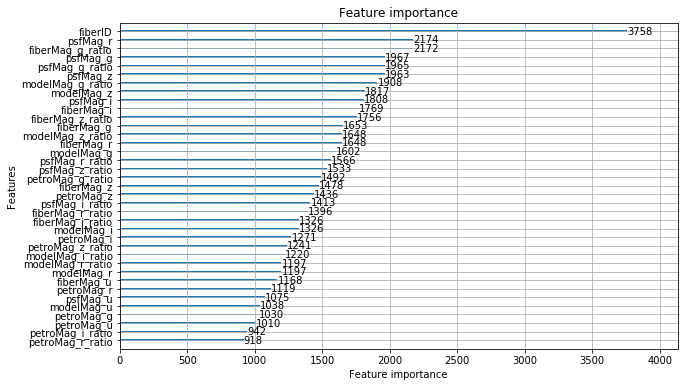

In [15]:
fig, ax = plt.subplots(figsize = (10,6))
plot_importance(lgb, ax = ax)

02/16 
Tensorflow를 이용한 deep learning 방법 및 ensemble 방법으로 logloss를낮춰볼 예정이다.